In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# První kroky s modulem APSG
**APSG** poskytuje několik nových tříd pro práci se strukturními daty a
jejich vizualizací. Základním kamenem je třída pro práci s vektory
`Vec3`, která je odvozena z třídy `numpy.array`. Kromě běžně dostupných
metod této třídy poskytuje několik nových. Ukážeme si je v následujících příkladech.

Modul **APSG** můžeme načíst jak do vlastního jmenného prostoru tak do
aktivního, což je pro interaktivní práci výhodnejší:

In [2]:
from apsg import *

## Třída Vec3 pro práci s vektorama
Inicializace objektu vektor je možná z libovolného iterovatelného typu,
nejčastěji seznamu.

In [3]:
u = Vec3([1, -2, 3])
v = Vec3([-2, 2, 1])

Na základní vektorové operace používáme standardní matematické operátory:

In [4]:
u+v

V(-1.000, 0.000, 4.000)

In [5]:
3*u-2*v

V(7.000, -10.000, 7.000)

Délku vektoru můžeme zjistit příkazem `abs`:

In [6]:
abs(v)

3.0

In [7]:
abs(2*u)

7.4833147735478827

Metody třídy se vyvolávají tečkovou notací na objektu třídy.
Pro *skalární součin* používáme standartní operátor pro násobení `*` nebo metodu `dot`:

In [8]:
u*v

-3

In [9]:
u.dot(v)

-3

Pro *vektorový součin* používáme operátor `**` nebo metodu `cross`.

In [10]:
u**v

V(-8.000, -7.000, -2.000)

In [11]:
u.cross(v)

V(-8.000, -7.000, -2.000)

Projekci vektoru $\vec{u}$ na vektor $\vec{v}$ získáme pomocí metody `proj`:

In [12]:
u.proj(v)

V(0.667, -0.667, -0.333)

Úhel mezi vektorama ve stupních můžeme zjistit metodou `angle`:

In [13]:
u.angle(v)

105.501359566937

Rotace vektoru kolem osi provedeme metodou `rotate`. Rotovat
vektor $\vec{u}$ kolem vektoru $\vec{v}$ o 45°:

In [14]:
u.rotate(v,45)

V(2.788, 0.040, 2.495)

## Třídy Fol a Lin
Pro potřeby zpracování strukturních dat používáme třídy `Fol` (pro planární prvky) a `Lin` (pro lineární prvky) odvozené od třídy `Vec3`. Kromě metod `Vec3` umožňují konverzi zápisu používaného v geologii a jejich zobrazení v Schmidtovi projekci.

Inicializaci objektu `Fol` a `Lin` provádíme jednak z měření směru sklonu a sklonu anebo konverzí z objektu třídy `Vec3` přes tečkovou notaci:

In [15]:
Fol(216,62)

S:216/62

In [16]:
Lin(110,18)

L:110/18

In [17]:
u.asfol

S:117/37

In [18]:
u.aslin

L:297/53

## Použití metod třídy `Vec3` pro třídy `Fol` a `Lin`
Určení úhlu, který svírají dva lineární nebo planární prvky:

In [19]:
l1 = Lin(110,40)
l2 = Lin(160,30)
p1 = Fol(330,50)
p2 = Fol(250,40)
l1.angle(l2)

41.597412680035468

In [20]:
p1.angle(p2)

54.696399321975328

Konstrukce planárního prvku definovaného dvěma lineárníma prvkama:

In [21]:
l1**l2

S:113/40

In [22]:
l1.cross(l2)

S:113/40

Konstrukce lineárního prvku definovaného jako intersekci dvou planárních prvků:

In [23]:
p1**p2

L:278/36

In [24]:
p1.cross(p2)

L:278/36

Vektorový součin planárního a lineárního prvku lze použít pro konstrukci
plochy procházející pólem plochy a lineárním prvkem nebo pro nalezení kolmého
lineárního prvku v dané ploše:

In [25]:
l2**p2

S:96/53

In [26]:
p2**l2

L:276/37

Rotace strukturních prvků provedeme metodou `rotate`:

In [27]:
p2.rotate(l2,45)

S:269/78

## Schmidtova projekce
Strukturní prvky je možné vynášet ve Schmidtově projekci pomocí příkazu `StereoNet`:

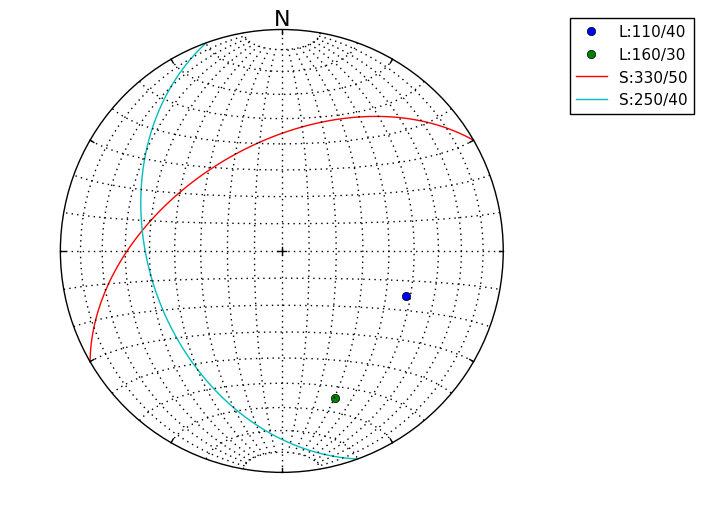

In [28]:
StereoNet(l1,l2,p1,p2)

Vizualizace plochy vzniklé konstrukcí s dvou lineárních prvků:

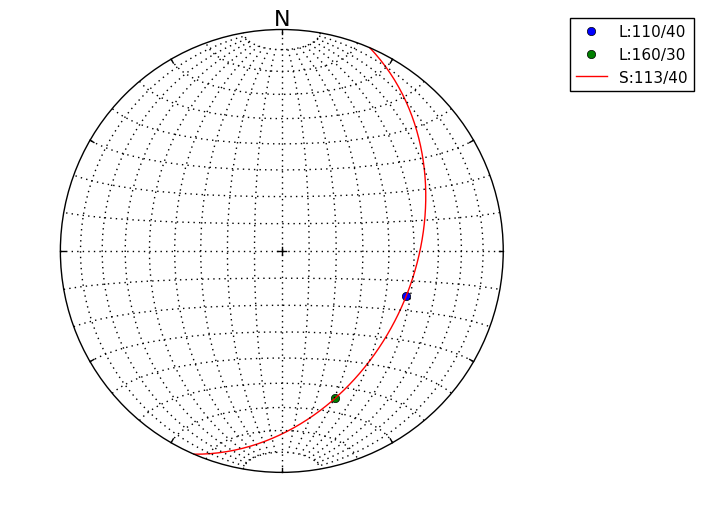

In [29]:
StereoNet(l1,l2,l1**l2)

Vizualizace linie definované intersekcí dvou planárních prvků:

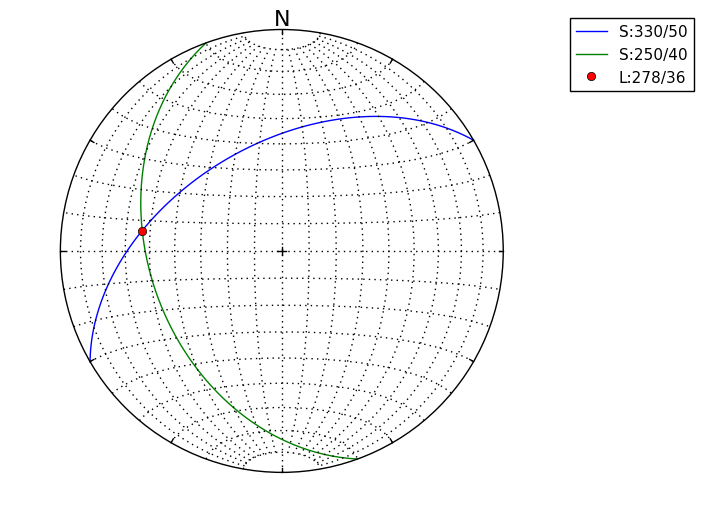

In [30]:
StereoNet(p1,p2,p1**p2)

Konstrukce plochy procházející pólem plochy a lineárním prvkem:

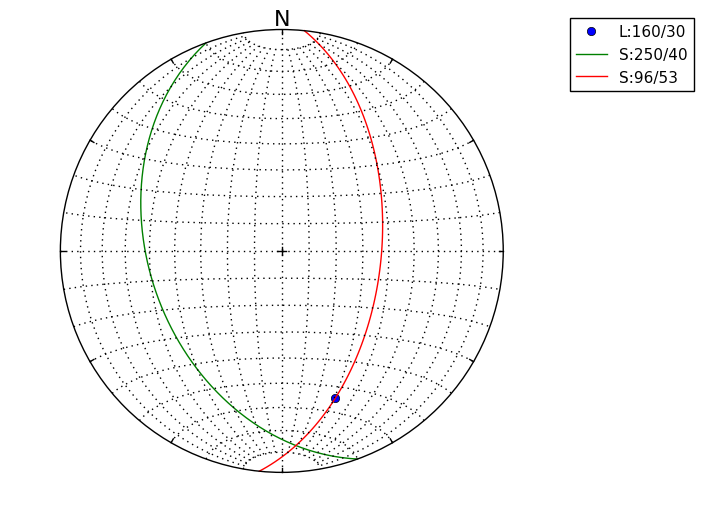

In [31]:
StereoNet(l2,p2,l2**p2)

Konstrukce lineárního prvku ležícího v dané ploše a kolmého k dané linii:

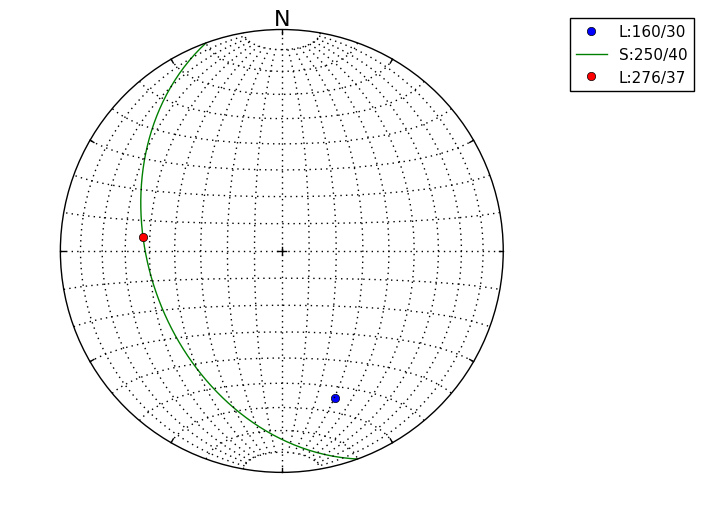

In [32]:
StereoNet(l2,p2,p2**l2)

Převod pólu plochy na lineární prvek:

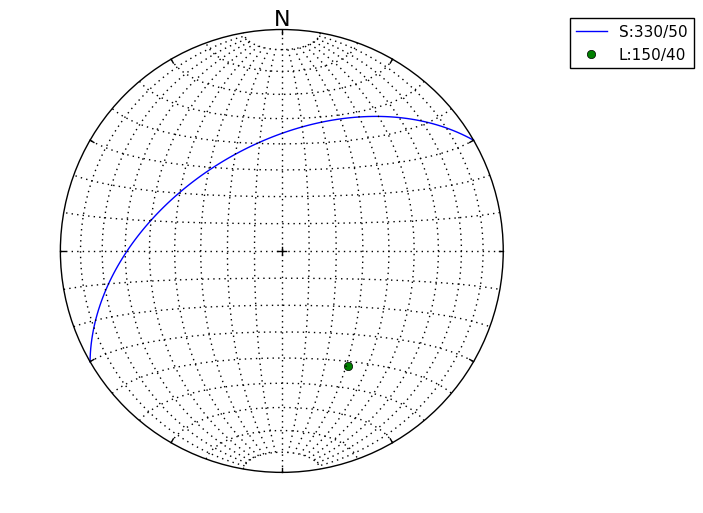

In [33]:
StereoNet(p1,p1.aslin)

Konstrukce plochy, které normála je daná lineárním prvkem:

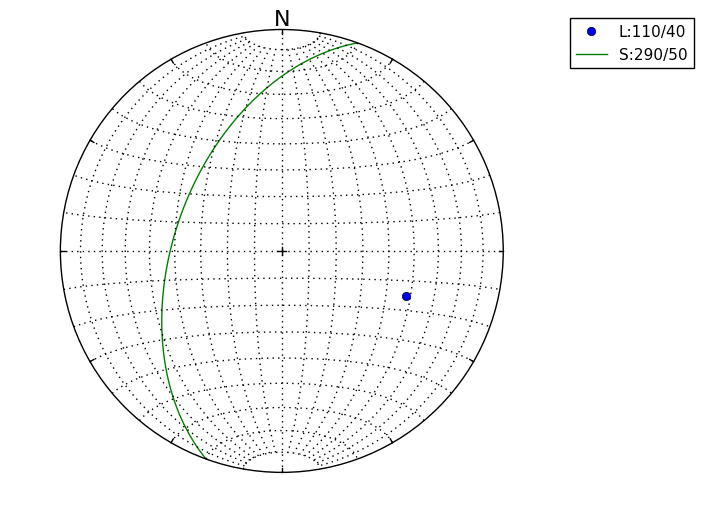

In [34]:
StereoNet(l1,l1.asfol)

In [35]:
from mystyle import css_styling
css_styling()